In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load dataset (Example: Boston Housing Dataset)
data=pd.read_csv("Student_Performance.csv")

# Display the first few rows of the dataset
print(data.head())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [11]:
df = pd.DataFrame(data)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_Activities
0,7,99,Yes,9,1,91.0,NaN
1,4,82,No,4,2,65.0,NaN
2,8,51,Yes,7,2,45.0,NaN
3,5,52,Yes,5,2,36.0,NaN
4,7,75,No,8,5,66.0,NaN
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,NaN
9996,7,64,Yes,8,5,58.0,NaN
9997,6,83,Yes,8,5,74.0,NaN
9998,9,97,Yes,7,0,95.0,NaN


In [12]:
df['Extracurricular_Activities'] = df['Extracurricular Activities'].map({'yes': 1, 'no': 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_Activities
0,7,99,Yes,9,1,91.0,NaN
1,4,82,No,4,2,65.0,NaN
2,8,51,Yes,7,2,45.0,NaN
3,5,52,Yes,5,2,36.0,NaN
4,7,75,No,8,5,66.0,NaN
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,NaN
9996,7,64,Yes,8,5,58.0,NaN
9997,6,83,Yes,8,5,74.0,NaN
9998,9,97,Yes,7,0,95.0,NaN


In [13]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']
X
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# One-hot encode and ensure consistent columns
X_train = pd.get_dummies(X_train, columns=['Extracurricular Activities'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Extracurricular Activities'], drop_first=True)

# Align X_test to have the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train
X_test

# Create and train the model

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
6252,5,69,8,2,0
4684,2,46,4,8,1
1731,7,56,7,5,1
4742,6,42,8,5,1
4521,7,53,4,6,0
...,...,...,...,...,...
6412,2,70,7,3,0
8285,4,79,9,3,0
7853,2,40,7,2,1
1095,3,83,7,5,0


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:




y_pred = model.predict(X_test)
y_pred


array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


Mean Squared Error: 4.082628398521857
R-squared: 0.9889832909573145


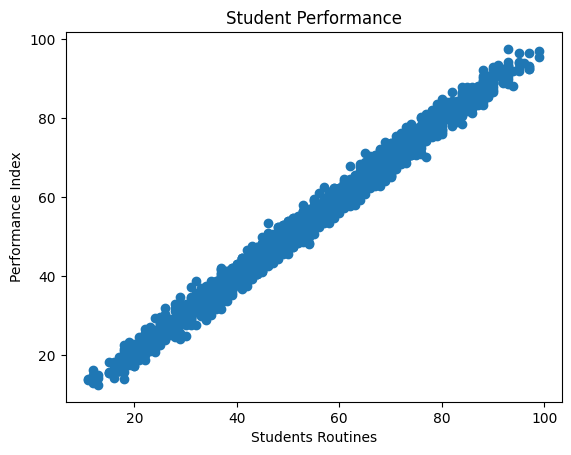

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Students Routines')
plt.ylabel('Performance Index')
plt.title('Student Performance')
plt.show()